20163228 Yuseon Nam

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#
# Normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# Sum of square of image matrix (L2-Norm)
# new_sum = x1^2 + x2^2 + ... + xn^2 + xnew^2
#
def sum_img_list(new_img_list, sum_2):
    
    new_sum = sum_2 + new_img_list ** 2
    
    return (new_sum)

#
# Read Train File	
#
file_data   = "mnist_train.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# 1. Read a line from data
# 2. Get a label from line
# 3. Add 1 to count the number of each label
# 4. Get a image vector from line
# 5. Normalize the vector 
# 6. Get the sum(L2-Norm) of image vector of certain label
#

# sum image vector of each label(0-9) in array form (label, 28 * 28)
sum_img_vector = np.empty((10, size_row * size_col), dtype=float)
num_count      = np.empty(10, dtype=int)	# count for each label(0-9)

for line in data:

    line_data         = line.split(',')    # len(line_data) = 784
    label             = line_data[0]
    label             = int(label)
    num_count[label] += 1
    
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    sum_img_vector[label, :] = sum_img_list(im_vector, sum_img_vector[label, :])
    
    
#
# Get average image matrix of each label by calculating sqrt(sum / count)
# And reshape vector(28*28) to matrix(28, 28)
#

# average image matrix of each label(0-9) in array form (label, 28, 28)
avg_img_matrix = np.empty((10, size_row, size_col), dtype=float)
for i in range(10) :
    sum_img_vector[i, :]    = (sum_img_vector[i, :] / num_count[i]) ** 0.5
    avg_img_matrix[i, :, :] = sum_img_vector[i, :].reshape(size_row, size_col)
        

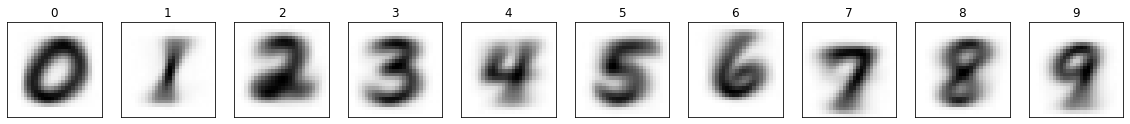

In [2]:
# 
# Plot average image of each number (0-9)
# 
f2 = plt.figure(figsize=(20,2))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(i)
    plt.imshow(avg_img_matrix[i, : , :], cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()